# 05. 슬롯머신 알고리즘

<br>

## 05.01. 테스트 중의 손실
- **새로운 솔루션의 평갓값이 현재 솔루션의 평갓값보다 낮은 '테스트 중의 손실'가능성이 존재**
    
    **하지만, 새로운 솔루션을 시험해보지 않는 이상 그 결과는 알 수 없으며, 리스크를 안고 탐색할수 밖에 없음**
    
    $\rightarrow$ **최적의 모델을 설계함에 잇어, '테스트 중의 손실'을 최소화 하며, 어떻게든 적은 횟수로 유용한 결과를 도출하려면?**
    
<br>

### 탐색과 활용
- **활용 (Explotion) : 자신이 알고 있는 최적의 행동을 함으로써 이익을 높임**
- **탐색 (Exploration) : 지식을 늘리기 위해 새로운 행동을 시도**

    $\rightarrow$ 활용만 계속하면 지식이 늘지 않고, 탐색만 계속하면 실패가 점점 늘어남

    $\rightarrow$ **탐색과 활용의 딜레마 : 상반되는 두 가지 행동 사이에서 발생하는 딜레마**

<br>

## 05.02. 다중 슬롯머신 문제

<br>

> 밴딧 : 카지노의 슬롯머신이 마치 도둑처럼 플레이어로부터 야금야금 돈을 빼앗아가는 모습 때문에 슬롯머신을 총칭하는 말

<br>

### 다중 슬롯머신 문제
- 어떤 슬롯머신은 높은 확률로 당첨을 주는 슬롯머신일 수도 있고, 어떤 슬롯머신은 거의 당첨을 주지 않는 슬롯머신
- 하지만 어떤 슬롯머신인지는 실제로 레버를 당겨봐야 알 수 있으며, 가능한 많은 상금을 가져가려면 어떤 전략에 따라 동전을 넣어야 하는가?
- 다중 슬롯머신은 여러가지 솔루션 (선택지, 레버)과의 상호작용을 고려하는 문제

<br>

### 확률적 슬롯머신 문제
- 확률적 슬롯머신 문제에는 솔루션을 선택했을 때의 보상이 어떤 확률 분포에 따라 주어진다고 가정. 그리고 얻은 보상의 합계 (누적 보상)을 최대로 하는 방법을 탐색색

<br>

### 에이전트 (Agent)
- **최적의 솔루션을 찾아내는 주체**
- 에이전트는$K$개의 솔루션 $X = {x_1, \dots, x_k}$와 대치하고 있으며, 누적보상을 최대화 하는 것을 목표로 함
    
    **여기에서 에이전트왇 ㅐ치하는 대상 전체를 환경 (Environment)**
    
- **각 솔루션 $x_k \in X$는 고유의 기댓값 파라미터 $\theta_k$를 가지고 있으며, 호출될 때마다 그 기댓값에 맞춰 보상 $r \sim p(r|\theta_k)$의 샘플을 에이전트에 제공**

<br>

- 에이전트는 총 $T$호ㅓㅣㅅ수만큼 다양한 솔루션을 시도할 수 있으며, 그중 $t$번째 횟수에 선택한 솔루션을 $x(t)$로 표현
    
    또한 그떄 얻은 보상을 $r_{x(t)} (t)\;(=r(t))$

<br>

- 다양한 솔루션을 시도할 수 있는 횟수의 상한선인 $T$를 **예산**이라고 부르며 $(1 \leq t \leq T)$는 **시각**
    
    $\rightarrow$ 누적 보상은 $R(T) = \sum^T_{t=1} r(t)$
    
    $\rightarrow$ 이를 최대화하는 전략 **방책**

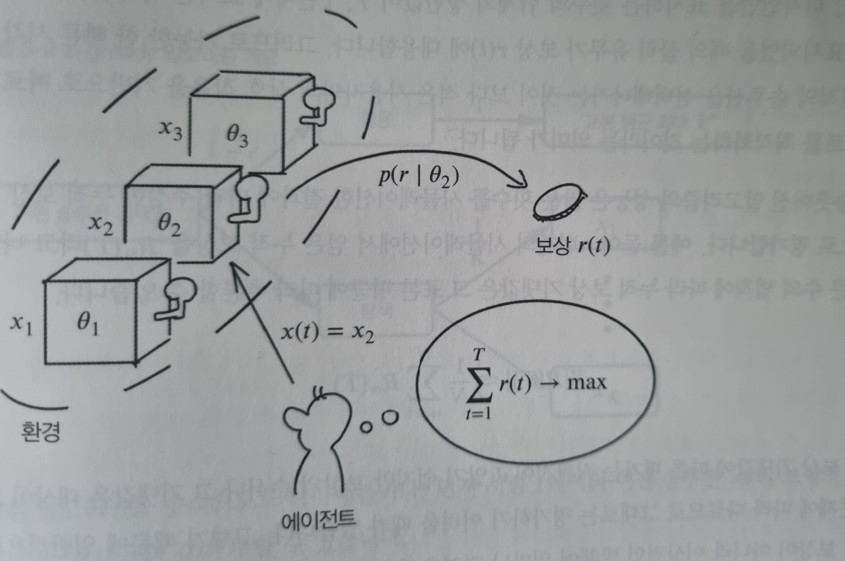

<br>

- **웹최적화의 컨텍스트에서, 웹사이트를 최적화하려는 시스템은 에이전트,**
    
    **디자인의 집합과 테스트에 관련된 사용자를 하나로 모아서 생각한 것이 환경**
    
    **각 디자인안이 솔루션 $x_k \in X$**
    
    **디자인안을 표시하는 횟수의 합계의 상한값이 $T$**
    
    **$t$번째에 표시한 디자인안이 $x(t)$**
    
    **$x(t)$가 표시되었을 때의 클릭 유무가 보상 $r(t)$**
    
    $\rightarrow$ **가능한 빠른 시각 $t$에서 최적의 솔루션을 선택해나가는 것이 보다 적은 사용자 상호작용을 기반으로 빠르게 웹사이트를 최적화 하는 것**

<br>

### 누적보상
- **슬롯머신 알고리즘의 성능은 많은 횟수를 시뮬레이션한 결과에 따라 추정한 누적 보상 기댓값으로 평가**
- $n$번째의 시뮬레이션에서 얻은 누적 보상이 $R_n(T)$일 때,
    
    대수의 법칙에 따라 누적 보상 기댓값은, 표본평균에 따라 추론
    
$$E[R(T)] \simeq \frac{1}{N} \sum^N_{n=1} R_n(T) $$

- **누적보상 기댓값에 따른 평가는 직관적이고 알기 쉽지만 보상의 순서나 그 기댓값은 대상이 되는 문제에 따라 다르므로, 그대로는 평가하기 어려움**
    
    $\rightarrow$ **그렇기에 일반적으로 누적보상이 아니라 이상적인 방책에 얼마나 가까운지 평가**
    
<br>

- **이상적인 방책이란 항상 기댓값이 최고인 솔루션을 계속 선택하는 가상의 방책**
    
    **여기에서 기댓값 최대 솔루션, 즉 최적 솔루션을 $x^*$로 나타내면, 한 번의 시뮬레이션에서 생성되는 이상적인 방책과 누적 보상의 차이는**
    
$$\text{후회} = Regret(T) = \sum^T_{t=1} (r_{x^*} (t) - r_{x(t)} (t))$$

- **여러 차례의 시뮬레이션에 의해 추정된 후회의 기댓값 $E[Regret(T)]$는 기대 후회이며, 일반적으로 이를 이용하여 방책을 평가**

<br>

## 05.03. $\epsilon$-greedy 알고리즘
- $\epsilon$-greedy 알고리즘은 어떤 작은 확률  $\epsilon$으로 탐색 행동을 취하고 그 외의 확률 $(1-x)$로 활용 행동을 취하는 것
- **탐색 행동을 선택한 경우에는 솔루션을 무작위로 선택하고,**

    **활용 행동을 선택한 경우에는 그 시점에서 얻어진 보상의 표본평균이 최대인 솔루션 $\hat{x}^* (t)$를 선택**
    
    

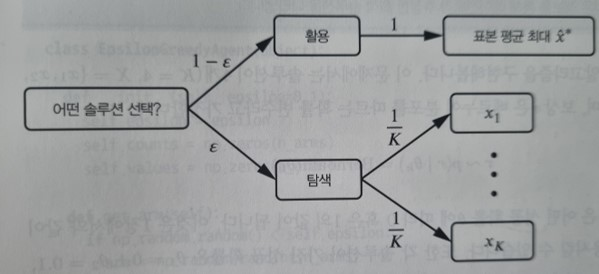

<br>

- **$\hat{\theta}_k$ : 시점 $t$에서의 어떤 솔루션 $x_k$의 보상의 표본평균**
    
    시각 $t$까지 솔루션 $x_k$를 선택해서 얻은 보상의 합계를 시각 $t$까지 솔루션 $x_k$를 선택한 횟수로 나눈 것

$$\hat{\theta}_k(t) = \frac{\sum^t_{\tau=1} r(\tau) I(x(\tau)=x_k)}{\sum^t_{\tau=1}I(x(\tau)=x_k)} = \frac{\sum^t_{\tau=1}r(\tau) I(x(\tau)=x_k)}{N_k(t)}$$

<br>

- **시각 $t$까지 솔루션 $x_k$를 선택한 횟수**

$$N_k(t) = \sum^t_{r=1} I(x(\tau)=x_k)$$

<br>

- **활용 행동을 선택할 때, 보상의 표본 평균 $\hat{\theta}_k (t)$가 최대가 되는 솔루션 $\hat{x}^* (t)$를 선택**

$$\hat{x}^* (t) = arg max_{x_k \in X} \hat{\theta_k}(t)$$

<br>

### $\epsilon$-greedy 알고리즘 구현
- 솔루션이 4개 ($K=4$, $X = {x_1, x_2, x_3, x_4}$) 존재
- 보상 $r$은 베르누이 분포를 따르는 확률 변수라고 가정

$$r \sim p(r|\theta_k) = Bernoulli(\theta_k)$$

- 보상 $r$은 어떤 성공 확률 $\theta$에 따라 0 혹은 1의 값
- 각 솔루션이 가진 성공 확률은 $\theta_1 = 0.1$, $\theta_2 = 0.1$, $\theta_3 = 0.2$, $\theta_4 = 0.3$이라고 가정

$\rightarrow$ 이 문제의 최적 솔루션은 $x^*= x_4$

$\rightarrow$ **하지만 에이전트는 이를 알지 못하므로 $x_4$가 얼마나 유망한지 빠르게 알아내 최적 방책에 가까운 행동을 하는지가 핵심**

<br>

#### 환경 구현

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
np.random.seed(0)
n_arms = 4

In [57]:
class Env(object):
    thetas = [0.1, 0.1, 0.2, 0.3]
    
    # 특정 솔루션의 인덱스를 제시하면, 성공확률 theta[i]의 베르누이 분포에 따른 보상을 샘플로 반환
    def react(arm):
        return 1 if np.random.random() < Env.thetas[arm] else 0
    
    # 최적 솔루션의 인덱스를 반환
    def opt():
        return np.argmax(Env.thetas)

<br>

#### $\epsilon$-greedy 알고리즘 에이전트
- **`epsilon` : 탐색 행동을 취할 확률**
- **`self.counts` : 각 솔루션을 선택한 횟수 $N_k(t)$**
- **`self.values` : 각 솔루션으로부터 얻은 보상의 표본평균 $\hat{\theta_k}(t)$**

In [63]:
class EpsilonGreedyAgent(object):
  
    def __init__(self, epsilon=0.1): 
        self.epsilon = epsilon 
        self.counts = np.zeros(n_arms) 
        self.values = np.zeros(n_arms)

    # epsilon에 따른 행동
    def get_arm(self):
        if np.random.random() < self.epsilon:
            # 탐색 행동시 무작위로 솔루션을 선택
            arm = np.random.randint(n_arms) 
        else:
            # 활용 행동시 보상의 표본평균이 최대가 되는 솔루션을 선택
            arm = np.argmax(self.values) 
        
        return arm
    
    # 환경으로부터 얻은 보상을 관측하고, 솔루션을 선택한 횟수와 각 솔루션의 누적보상 표본평균을 업데이트
    def sample(self, arm, reward): 
        self.counts[arm] += 1 
        self.values[arm] = ((self.counts[arm] - 1) * self.values[arm] + reward) / self.counts[arm]

<br>

- 수열 평균
    - 어떤 수열의 평균값 $\mu_{n}$
    
$$\mu_n = \frac{\sum^n_{i=1} a_i}{n}$$

- 새롭게 $n+1$번째 수가 추가되었을 때의 평균

$$\mu_{n+1} = \frac{\sum^{n+1}_{i=1} a_i}{n+1} =\\ \frac{a_1 + \dots a_n}{n+1} + \frac{a_{n+1}}{n+1}= \\ \frac{n}{n+1} \frac{\sum^n_{i=1}a_i}{n} + \frac{a_{n+1}}{n+1} =\\ \frac{n}{n+1} \mu_n + \frac{a_{n+1}}{n+1}$$


<br>

#### $\epsilon$-greedy 알고리즘을 통한 최적의 솔루션 탐색
- **1회 시뮬레이션당 예산 `T` = 1000**
- 환경이 난수를 기반으로 보상을 주기에, 우연이라는 요소의 영향을 낮추기 위해 `N`만큼의 시뮬레이션을 시행하여 평균값을 계산

In [64]:
def sim(Agent, N=1000, T=1000, **kwargs):
    
    selected_arms = [[0 for _ in range(T)] for _ in range(N)] 
    earned_rewards = [[0 for _ in range(T)] for _ in range(N)]

    for n in range(N):
        agent = Agent(**kwargs)
        
        for t in range(T):
            arm = agent.get_arm() # epsilon에 따른 행동
            reward = Env.react(arm) # 행동에 따른 보상
            agent.sample(arm, reward) # 보상과, 누적보상 표본평균 업데이트
            
            # 행동과 보상 기록
            selected_arms[n][t] = arm
            earned_rewards[n][t] = reward
            
    return np.array(selected_arms), np.array(earned_rewards)

<br>

- $N=1000$번의 시뮬레이션 중 선택된 솔루션이 최적 솔루션과 일치하는 비율을 통하여, 정답률 (Accuracy) $E[x(t) = x^*]$의 추이를 산출

    $\rightarrow$ 1000번 정도의 상호작용을 통하여 80% 가량의 비율로 최적의 선택지를 선택

In [65]:
arms_eg, rewards_eg = sim(EpsilonGreedyAgent)
acc = np.mean(arms_eg == Env.opt(), axis=0)

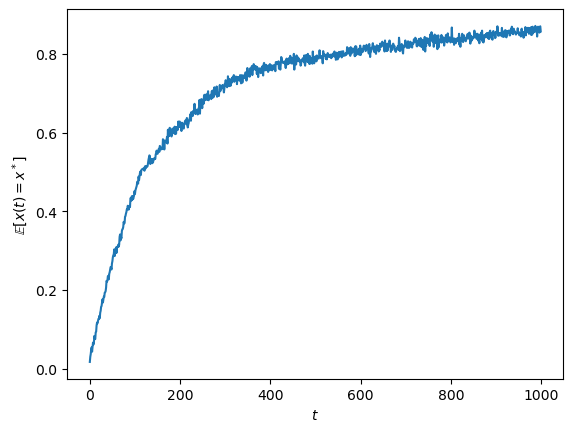

In [66]:
plt.plot(acc)
plt.xlabel(r'$t$')
plt.ylabel(r'$\mathbb{E}[x(t) = x^*]$')
plt.show() 

<br>

#### 이상과의 괴리
- 항상 최적의 솔루션을 알고있는 에이전트 (Oracle)가 존재한다고 가정하고, $\epsilon$-greedy 알고리즘과 누적보상 비교

In [71]:
class OracleAgent(object): 
    def __init__(self):
        self.arm = Env.opt()

    def get_arm(self):
        return self.arm

    def sample(self, arm, reward):
        pass

- Oracle과 비교했을 때, 누적 보상 차이가 후회에 해당하며, 누적보상의 증가 속도가 느림

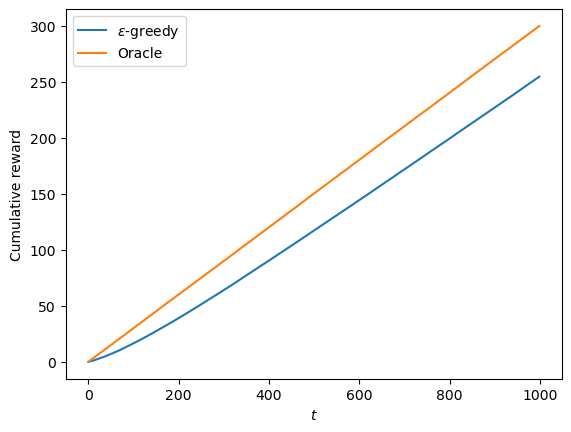

In [62]:
arms_o, rewards_o = sim(OracleAgent)
plt.plot(np.mean(np.cumsum(rewards_eg, axis=1), axis=0), label=r'$\varepsilon$-greedy')
plt.plot(np.mean(np.cumsum(rewards_o, axis=1), axis=0), label=r'Oracle')
plt.xlabel(r'$t$')
plt.ylabel('Cumulative reward')
plt.legend()
plt.show()

<br>

## 05.04. 시뮬레이티드 어닐링 $\epsilon$-greedy 알고리즘
- $\epsilon$-greedy 알고리즘에서는 어떤 일정한 탐색 확률인 $\epsilon$을 설정
    
    $\rightarrow$ **탐색 행동을 얻는 빈도를 고정**

    $\rightarrow$ 실제로는 미래에 다룰 문제에 관해서는 알지 못하기 때문에, 어느 정도의 확률을 설정하는 것이 좋은지 알 수 없음

<br>

- **탐색 초반에는 다양한 선택지를 시험해서 정보를 얻는 것이 중요하지만, 대부분의 정보가 수집된 후반에도 계속해서 높은 확률로 탐색을 수행하는 것은, 귀중한 샘플을 남용하는 것**
    
    $\rightarrow$ **누계 정보를 최대화하기에는 초반에는 탐색 행동을 많이하고, 점점 활용 행동으로 이동하는 방식 필요**
    
    $\rightarrow$ **시뮬레이티드 어닐링**
    
    $\rightarrow$ 이동 규칙에 온도 파라미터에 따라 제어되는 불규칙성을 추가 
    
    **최초는 무작위의 행동을 취하고, 점점 긴장되어 간다는 움직임을 확률적 슬롯머신 문제에도 적용**
    
    <br>
    
    $\rightarrow$ **시뮬레이티드 어닐링 $\epsilon$-greedy 알고리즘 (탐색 행동을 취하는 확률 $\epsilon$을 점점 줄여가는 알고리즘**

<br>

#### 시뮬레이티드 어닐링 $\epsilon$-greedy 알고리즘 에이전트
- **`get_arm`이 호출될 때마다 0.99를 곱함으로써 점점 작게됨 (냉각)**

In [74]:
class AnnealingEpsilonGreedyAgent(object):

    def __init__(self, epsilon=1.0): 
        self.epsilon = epsilon 
        self.counts = np.zeros(n_arms) 
        self.values = np.zeros(n_arms)

    # epsilon에 따른 행동
    def get_arm(self):
        if np.random.random() < self.epsilon:
            # 탐색 행동시 무작위로 솔루션을 선택
            arm = np.random.randint(n_arms) 
        else:
            # 활용 행동시 보상의 표본평균이 최대가 되는 솔루션을 선택
            arm = np.argmax(self.values)
        
        # 한번의 호출마다 0.99를 곱함으로서 점점 epsilon값이 작게됨 (냉각)
        self.epsilon *= 0.99
        
        return arm

    # 환경으로부터 얻은 보상을 관측하고, 솔루션을 선택한 횟수와 각 솔루션의 누적보상 표본평균을 업데이트
    def sample(self, arm, reward): 
        self.counts[arm] += 1 
        self.values[arm] = ((self.counts[arm] - 1) * self.values[arm] + reward) / self.counts[arm]

<br>

- **시뮬레이티드 어닐링을 통하여, 일반 $\epsilon$-greedy 알고리즘보다 빠르게 정답률이 향상**

    (**$t=600$ 부근에서 상승이 멈춤 : 과냉각으로 추정 가능**)

In [75]:
arms_aeg, rewards_aeg = sim(AnnealingEpsilonGreedyAgent)

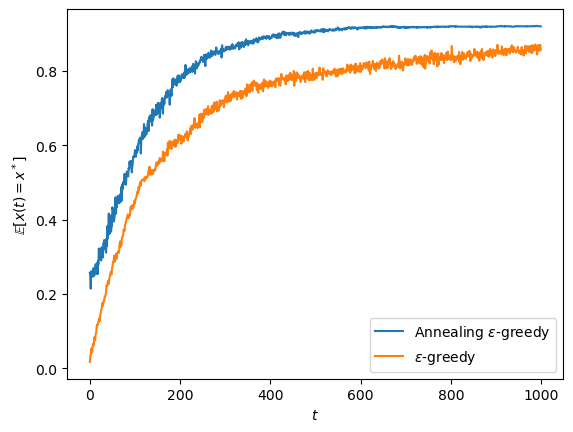

In [76]:
plt.plot(np.mean(arms_aeg == Env.opt(), axis=0), label=r'Annealing $\varepsilon$-greedy')
plt.plot(np.mean(arms_eg == Env.opt(), axis=0), label=r'$\varepsilon$-greedy')
plt.xlabel(r'$t$')
plt.ylabel(r'$\mathbb{E}[x(t) = x^*]$')
plt.legend()
plt.show() 

<br>

## 05.05. 소프트맥스 알고리즘 (Softmax Algorithm)
- $\epsilon$-greedy 알고리즘은 어떤 일정한 확률을 이용해 활용에서 탐색으로 행동을 전환하는 아이디어
    
    **하지만, 솔루션 사이의 퍼포먼스 차이에 관계없이 일정한 확률로 탐색 행동을 취함**
    
    - 예) 최적의 선택지와 퍼포먼스가 상당히 가까운 '아쉬운' 선택지와, 다른 것보다 명확하게 뒤떨어지는 '논외의'선택지가 있다고 가정
    
        $\rightarrow$ **하면 최적의 선택지와, 아쉬운 선택지에 많은 샘플을 할당하여, 결과를 보는 것이 적절하지만,** 
            
        **$\epsilon$-greedy 알고리즘은 특정한 확률 $\epsilon$으로 완전히 무작위로 선택지를 고르기 때문에, '논외의' 선택지에도 일정한 확률로 샘플을 할당**
        
<br>

### 소프트맥스 알고리즘
- **보상의 표본평균에 맞춰 탐색 확률을 제어**

- **소프트맥스 알고리즘은 솔루션의 보상의 표본평균 $\hat{\theta_k}(t)$에 맞춰 표시할 확률을 변화시킬 수 있음**
  
  
- **$t$시점에 솔루션 $x_k$를 사용자에게 표시할 확률 $p(t, x_k)$은,** 

    **보상의 표본평균 $\hat{\theta_k}(t)$를 어떤 파라미터 $\tau$로 나눈 값에 소프트맥스 함수를 적용한 값**


$$p(t, x_k) = \frac{exp(\frac{\hat{\theta_k} (t)}{\tau})}{\sum^K_{k=1} exp(\frac{\hat{\theta_k }(t)}{\tau})}$$

<br>

$$softmax(x) = (\frac{exp(x_1)}{\sum^m_{i=1} exp(x_t)}, \dots, \frac{exp(x_m)}{\sum^m_{i=1}exp(x_t)})$$

<br>

- 소프트맥스를 2차원 입력에 적용한 특수한 경우에 해당하는 것이 로지스틱 함수
    
    - 로지스틱 함수는 0 이상 1 이하의 실수를 반환하지만, 소프트맥스는 각 요소의 합이 1이 되는 벡터를 반환
    
    $\rightarrow$ 소프트맥스 함수는 어떤 벡터를 카테고리컬 분포의 성공률 파라미터로 정규화하는데 자주 이용
    
<br>

- **소프트맥스 알고리즘은 $p(t, x_1), \dots p(t, x_K)$를 성공률 파라미터로 가지는 카테고리컬 분포에서 생성된 솔루션을 선택**
    
    $\rightarrow$ **보상의 표본평균이 큰 솔루션에 보다 큰 선택확률을 할당하게 되므로,**
        
     **가능성이 희박한 논외의 선택지에도 유망한 솔루션과 같은 정도의 선택확률을 할당하는 $\epsilon$-greedy가 가진 단점을 보완**
     
 <br>
 
- **$\tau$는 보상의 스케일을 보장하기 위한 파라미터**
    
    <br>
    
    - **보상이 0 또는 1의 값으로 나타나는 클릭의 발생률을 최적화하는 문제와, 보상이 임의의 정수로 나타나는 제품의 구입액을 최적화 하는 등의 문제에서는, 각 선택지의 보상이 표본평균의 스케일이 다름**
     
     <br>
     
    - **선택지가 2개인 문제에 대하여, 2개 선택지 사이에 5배만큼의 차이가 있다면 $\rightarrow$ $logit(5) \approx 0.99$**
         
         $\rightarrow$ **한쪽 선택지가 선택될 확률은 거의 0에 근접 $\rightarrow$ 이 차이가 우연히라도 발생하면, 이후 해당 선택지가 선택될 기회는 사라짐**
         
         $\rightarrow$ **보상의 스케일을 보장하기 위한 필요성 존재**


<br>

#### 소프트맥스 알고리즘 에이전트

- 어떤 정수 $A$에 대해

$$\frac{exp(x_k - A)}{\sum^K_{k=1} exp(x_k - A)} = \frac{\frac{exp(x_k)}{exp(A)}}{\frac{1}{exp(A)} \sum^K_{k=1} exp(x_k)} = \frac{exp(x_k)}{\sum^K_{k=1} exp(x_k)}$$이기에, `logit`의 계산에 `np.max(logit)`을 뺌

$\rightarrow$ `logit`값이 그대로 대입됨에 따라 매우 큰값이 되어 오버플로가 발생할 가능성을 방지

In [77]:
class SoftmaxAgent(object):

    def __init__(self, tau=.05): 
        self.tau = tau
        self.counts = np.zeros(n_arms) 
        self.values = np.zeros(n_arms)

    def softmax_p(self):
        logit = self.values / self.tau
        logit = logit - np.max(logit)
        p = np.exp(logit) / sum(np.exp(logit)) 
        
        return 

    def get_arm(self):
        arm = np.random.choice(n_arms, p=self.softmax_p()) 
        
        return arm
    
    # 환경으로부터 얻은 보상을 관측하고, 솔루션을 선택한 횟수와 각 솔루션의 누적보상 표본평균을 업데이트
    def sample(self, arm, reward): 
        self.counts[arm] = self.counts[arm] + 1 
        self.values[arm] = ((self.counts[arm] - 1) * self.values[arm] + reward) / self.counts[arm]

<br>

- **$\epsilon$-greedy 알고리즘보다 정답률이 높으며, 적은 평가횟수로 최적의 선택지를 발견할 수 있음**
- '지금까지의 경험상 가장 좋은 가 또는 아닌가'의 두 가지 기준으로만 선택지를 보는 것이 아니라 보상의 표본평균에 따라 선택확률을 계산함으로써,
    
    보다 유망한 선택지에 샘플을 할당할 수 있으므로 빠른 속도로 최적화로 이어짐

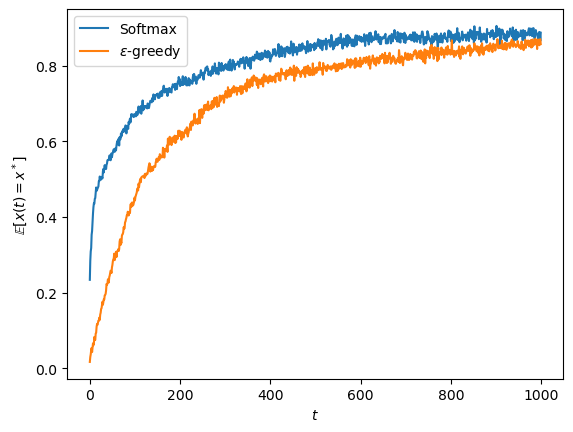

In [78]:
arms_sm, rewards_sm = sim(SoftmaxAgent)
plt.plot(np.mean(arms_sm == Env.opt(), axis=0), label=r'Softmax')
plt.plot(np.mean(arms_eg == Env.opt(), axis=0), label=r'$\varepsilon$-greedy')
plt.xlabel(r'$t$')
plt.ylabel(r'$\mathbb{E}[x(t) = x^*]$')
plt.legend()
plt.show()  

<br>

### 시뮬레이티드 어닐링 소프트맥스 알고리즘
- **소프트맥스 알고리즘의 일반적인 구현에서는 이 $\tau$ 파라미터를 온도 파라미터로 간주하여, 시뮬레이티드 어닐링 기법을 도입**
    - 온도 파라미터를 탐색 초반에는 큰 값(고온 상태)로 하고, 탐색이 진행됨에 따라 점점 작은 값 (작은상태)로 변화

- 탐색 초반에는 표본평균이 낮은 솔루션도 적극적으로 시도하는 탐색 중심의 동작을 하고, 종반에는 표본평균의 차이에 엄격한 솔루션을 중심으로 선택하는 활용 중심의 동작


<br>

#### 시뮬레이티드 소프트맥스 알고리즘 에이전트

- `get_arm` 메서드가 호출될 떄마다, 온도에 0.9를 곱하여 냉각을 실행

In [79]:
class AnnealingSoftmaxAgent(object):

    def __init__(self, tau=1000.):
        self.tau = tau
        self.counts = np.zeros(n_arms) 
        self.values = np.zeros(n_arms)

    def softmax_p(self):
        logit = self.values / self.tau
        logit = logit - np.max(logit)
        p = np.exp(logit) / sum(np.exp(logit)) 
        return p

    def get_arm(self):
        arm = np.random.choice(n_arms, p=self.softmax_p()) 
        self.tau = self.tau * 0.9
        return arm

    def sample(self, arm, reward): 
        self.counts[arm] = self.counts[arm] + 1 
        self.values[arm] = ((self.counts[arm] - 1) * self.values[arm] + reward) / self.counts[arm]

<br>

- 일반 소프트맥스 알고리즘과 비교결과, 시뮬레이티드 어닐링 소프트맥스 알고리즘의 탐색 초반에는 낮은 정답률에 멈추어 있지만, 
    
    시간이 지남에 따라 활용 중심의 행동으로 이동해 높은 정답률을 달성

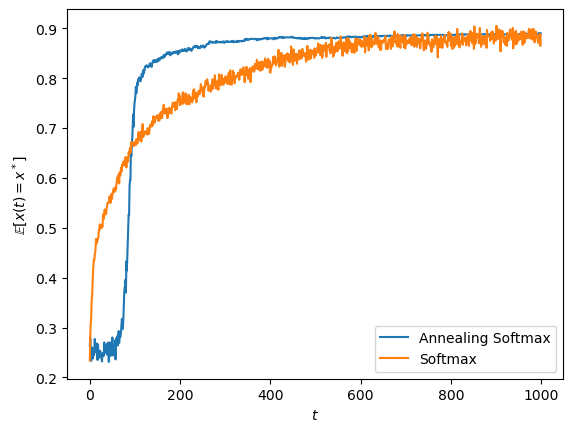

In [80]:
arms_asm, rewards_asm = sim(AnnealingSoftmaxAgent)
plt.plot(np.mean(arms_asm == Env.opt(), axis=0), label='Annealing Softmax')
plt.plot(np.mean(arms_sm == Env.opt(), axis=0), label='Softmax')
plt.xlabel(r'$t$')
plt.ylabel(r'$\mathbb{E}[x(t) = x^*]$')
plt.legend()
plt.show()  

<br>

## 05.06. 톰슨 샘플링 (Thompson Sampling)
- 소프트맥스 알고리즘에 나타난 소프트맥스 함수를 이용해 각 선택지를 선택하는 확률을 산출
    
    $\rightarrow$ 소프트맥스 함수를 이용함으로써 보상의 표본평균 (보상의 기댓값의 추정값)에 따라 탐색 확률을 산출

<br>

- **톰슨 샘플링에서는 각 선택지에서 얻은 보상 기댓값의 사후분포를 추론**
    
    **사후분포로부터 난수를 생성하고, 가장 큰 값을 얻어낼 수 있는 선택지를 선택하는 과정을 반복**


<br>

#### 톰슨 샘플링 에이전트
- **보상 데이터가 발생할 확률분포 (가능도)는 베르누이 분포로 모델화 가능**
    
    $\rightarrow$ **가능도가 베르누이 분포인 경우에는, 선택지별 데이터를 관측한 횟수 $N_i$과, 보상을 얻은 횟수 $a_i$를 통하여 베타사사후분포 계산 가능**
    
    **(베르누이분포를 따르는 (어떤 확률로 0 또는 1의 보상) 전제로 구현한 것이기 때문에 BernoulliTSAgent)**

<br>

- **$\epsilon$-greedy와 소프트맥스 알고리즘 에이전트는 각 선택지별 누적보상을 기록한 `self.values`를 가지고 있었지만,**
    
    **톰슨 샘플링 에이전트는 각 선택지별 누적보상을 기록한 `self.wins`를 가지고 있음**
    
<br>

- **`get_arm` 메서드 호출에서는 각 선택지별 선택한 횟수와 보상을 얻은 횟수를 기반으로 사후분포를 계산하여 난수를 생성**
    
    $\rightarrow$ **각 선택지별 사후분포로부터 난수를 생성하고, 생성된 값이 최대가 되는 선택지를 반환**

In [81]:
class BernoulliTSAgent(object):

    def __init__(self):
        self.counts = [0 for _ in range(n_arms)] 
        self.wins = [0 for _ in range(n_arms)]
    
    # 각 선택지별 베타사후분포 게산하여 난수생성후, 생성한 값이 최대가 되는 선택지를 반환
    def get_arm(self):
        beta = lambda N, a: np.random.beta(a + 1, N - a + 1)
        result = [beta(self.counts[i], self.wins[i]) for i in range(n_arms)] 
        arm = result.index(max(result))
        return arm

    def sample(self, arm, reward): 
        self.counts[arm] = self.counts[arm] + 1 
        self.wins[arm] = self.wins[arm] + reward

<br>

- 소프트맥스 알고리즘과 비교하였을 때, 톰슨 샘플링의 성능이 더 높음
- 소프트맥스 알고리즘은 온도 파라미터 $\tau$를 내부에 가지고 있으며, 냉각 방법에 따라 성능이 크게 달라짐
    
    반면 톰슨 샘플링은 그런 파라미터를 가지고 있지 않으며, 보상을 받는 분포에 따라 적절한 사후분포만 설계할 수 있다면 동작
    
    $\rightarrow$ **파라미터 튜닝을 하지 않아도 좋은 성능을 보인다는 것은 알고리즘 구축에 있어 큰 이점**

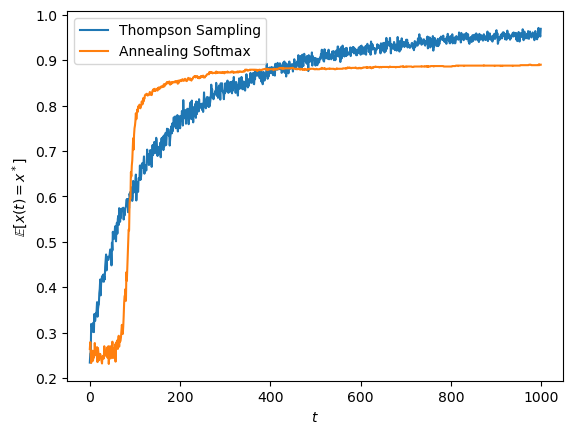

In [82]:
arms_ts, rewards_ts = sim(BernoulliTSAgent)
plt.plot(np.mean(arms_ts == Env.opt(), axis=0), label='Thompson Sampling')
plt.plot(np.mean(arms_asm == Env.opt(), axis=0), label='Annealing Softmax')
plt.xlabel(r'$t$')
plt.ylabel(r'$\mathbb{E}[x(t) = x^*]$')
plt.legend()
plt.show()  

<br>

## 05.07. UCB 알고리즘 (Upper Confidence Bound Algorithm)
- **UCB 알고리즘은 의사결정에 난수를 사용하지 않음**
- **UCB 알고리즘은 보상의 신뢰구간 (Confidence Interval)의 상한 (UCB)이 최대가 되는 솔루션을 선택하는 알고리즘**

<br>

- **시점 $t$에서의 솔루션 $x_k$의 UCB 값**
    - $N_k (t)$ : $t$시점까지의 솔루션 $x_k$가 선택된 횟수
    
$$UCB_k(t) = \hat{\theta}_k (t) + \sqrt{\frac{log (t)}{2N_k (t)}}$$

(신뢰구간의 폭을 넓게 설정할 수도 있음)

$$UCB_k(t) = \hat{\theta}_k (t) + \sqrt{\frac{2log (t)}{2N_k (t)}}$$



<br>

#### UCB 알고리즘 에이전트

- **`get_arm`에서는 한 번도 선택한 적이 없는 솔루션이 있다면, 먼저 그 솔루션을 제시**
    
    **모든 솔루션을 최소 한 번 이상 제시했다면 다음은 각 솔루션의 UCB값을 계산해서, 그 결괏값이 최대가 되는 솔루션을 제시**

<br>

- **`calc_ucb`에서는 어떤 솔루션의 UCB값을 산출, 각 솔루션의 보상의 표본평균인 `self.values`를 업데이트**
    


In [83]:
class UCBAgent(object):

    def __init__(self):
        self.counts = [0 for _ in range(n_arms)] 
        self.values = [0 for _ in range(n_arms)]

    def calc_ucb(self, arm):
        ucb = self.values[arm]
        ucb += np.sqrt(np.log(sum(self.counts)) / (2 * self.counts[arm]))
        
        return ucb

    def get_arm(self):
        if 0 in self.counts:
            arm = self.counts.index(0) 
            
        else:
            ucb = [self.calc_ucb(arm) for arm in range(n_arms)]
            arm = ucb.index(max(ucb)) 
        
        return arm

    def sample(self, arm, reward): 
        self.counts[arm] = self.counts[arm] + 1 
        self.values[arm] = ((self.counts[arm] - 1) * self.values[arm] + reward) / self.counts[arm]

<br>

- 톰슨 샘플링에는 다소 미치지 못하지만, UCB 알고리즘을 구현한 에이전트도 정답률이 향상되는 추세를 보임
- **UCB 알고리즘은 보상의 표본평균이 큰 것을 우선할 뿐만 아니라, 그 신뢰구간의 폭이 큰 것도 우선**
    
    **신뢰구간은 시도한 횟수가 적을수록 크기 때문에, 이는 보상이 탐색되지 않은 선택지에 대한 가산점으로 가정 가능**
    
<br>

- **보상의 표본평균에 확실하지 않은 폭을 추가한 것을 순차적으로 선택하는 아이디어는 확장 UCB 알고리즘에서도 중요**

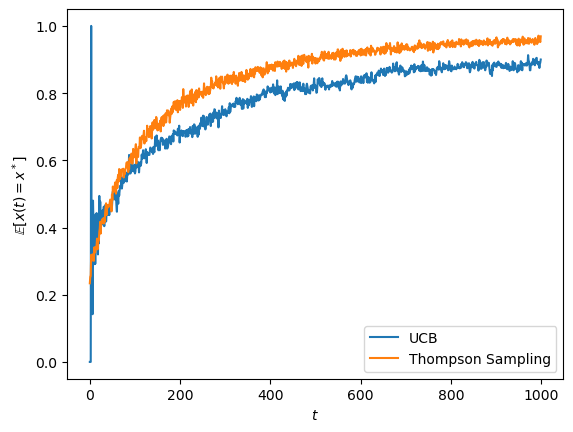

In [84]:
arms_ucb, rewards_ucb = sim(UCBAgent)
plt.plot(np.mean(arms_ucb == Env.opt(), axis=0), label='UCB')
plt.plot(np.mean(arms_ts == Env.opt(), axis=0), label='Thompson Sampling')
plt.xlabel(r'$t$')
plt.ylabel(r'$\mathbb{E}[x(t) = x^*]$')
plt.legend()
plt.show()  

<br>

## 05.08. 슬롯머신 알고리즘
- 슬롯머신 알고리즘은, 사용자에게 디자인안을 표시하는 방책 $\rightarrow$ 데이터를 얻어내는 기법 (사용자에게 다양한 디자인안을 표시하는 프로세스)

    - **데이터를 수집하는 과정을 문제에 포함하여 누적보상을 최대화하는 목적을 설정하고, 최적의 방책을 생각**
    
<br>

### 최적 슬롯 식별 문제
- **확률적 슬롯머신 문제는 누적 보상을 최대화하는 것이지만, 이 '목표 설정은 최적의 디자인안을 보다 빠르게 특정한다'는 목적과 완전히 부합한다고는 말할 수 없음**
    
    누적보상을 최대화하는 것과 최적의 선택지를 최단기간에 특정하는 것이 반드시 같지는 않기 때문

    - 예) **보상 기댓값 최대 솔루션과, 그 다음으로 큰 솔루션의 차이가 미미하다면, 차선책의 솔루션을 계속 선택해도 보상을 최대화한다는 관점에서는 충분하지만, 최적의 솔루션을 특정할 수 없다는 점에는 변함이 없음**
    

    - 누적 보상을 최대화하는 것이 아니라 최적 솔루션 탐색을 목적으로 하는 슬롯머신 문제는 **최적 슬롯 식별 문제 (Best Arm Identification)**
    
<br>

#### 최적 슬롯 식별 문제
- 특정한 예산 안에서 가능한 한 정확한 최적 솔루션을 추정하는 문제, 특정한 신뢰도 범위에서 가능한 한 빠르게 최적 솔루션을 추정하는 문제에 적합